## Exercise 1: The irreducible mass of black holes <a class="anchor" id="five"></a>


**1.1+1.2**



In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 KB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from astroML import stats as astroMLstats
from astropy.visualization.hist import hist as fancyhist
from scipy.stats import ks_2samp

In [ ]:
mu = 1
sigma = 0.02
N = 10000

M = np.random.normal(mu,sigma,N)
chi = np.random.uniform(size=N)

M_irr = np.array([m*np.sqrt((1+np.sqrt(1-s**2))/2) for m,s in zip(M,chi)])



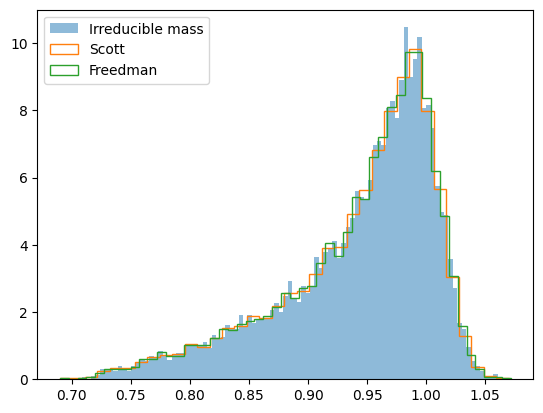

In [ ]:
_ = plt.hist(M_irr, bins=100, alpha=0.5, density=True, histtype='stepfilled',label='Irreducible mass')
sigmaG2 = astroMLstats.sigmaG(M_irr)
binsize = 2.7*sigmaG2/(N**(1/3))
binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max())
_ = fancyhist(M_irr, bins="scott", histtype="step",density=True,label='Scott')
_ = fancyhist(M_irr, bins="freedman", histtype="step",density=True,label='Freedman')


plt.legend()



**1.3**

In [ ]:


def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth,
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

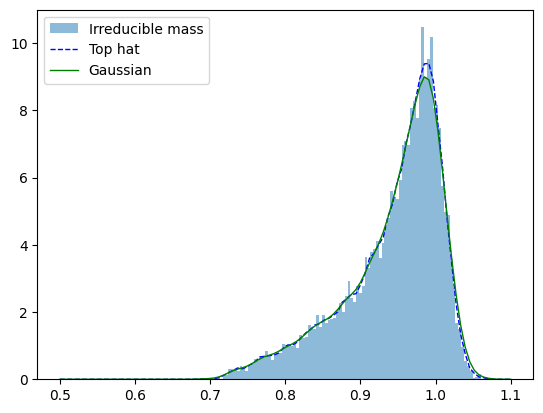

In [ ]:
x = np.linspace(0.5,1.1,100)
_ = plt.hist(M_irr, bins=100, alpha=0.5, density=True, histtype='stepfilled',label='Irreducible mass')
PDFtophat = kde_sklearn(M_irr,bandwidth=0.01, kernel="tophat")
plt.plot(x,PDFtophat, label='Top hat', ls='--',color='blue', linewidth=1)
PDFgaussian = kde_sklearn(M_irr,bandwidth=0.01, kernel="gaussian")
plt.plot(x,PDFgaussian, label= 'Gaussian', ls='-', color='green',linewidth=1)
plt.legend()

**1.4**

In [ ]:
np.random.seed(42)

f = np.array([np.sqrt((1+np.sqrt(1-s**2))/2) for s in chi])
sigma = np.logspace(-5,5,50)
D_f = np.empty(0)

for s in sigma:
  M = np.random.normal(loc=mu,scale=s,size=N)
  D_f = np.append(D_f,[ks_2samp(f, M*f)[0]])

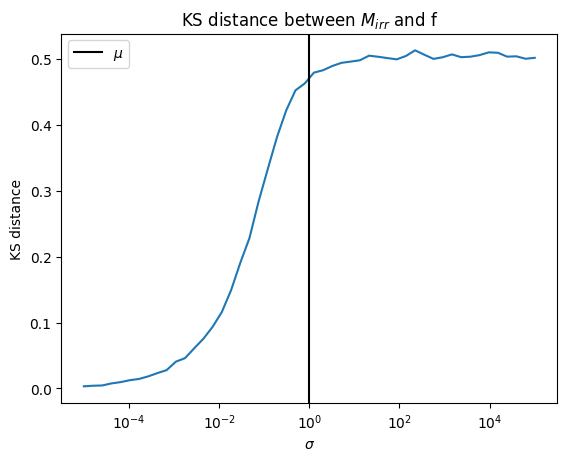

In [ ]:
plt.plot(sigma,D_f)
plt.semilogx()
plt.axvline(1, label='$\mu$', color='black')
plt.xlabel('$\sigma$')
plt.ylabel('KS distance')
plt.title('KS distance between $M_{irr}$ and f')
plt.legend()

The KS distance goes to zero for $\sigma\ll\mu$, i.e. $M_{irr}$ is distributed like f. The errors associate to $M$ and $M_{irr}$ are negligible compere to the errors of f.   

**1.5**

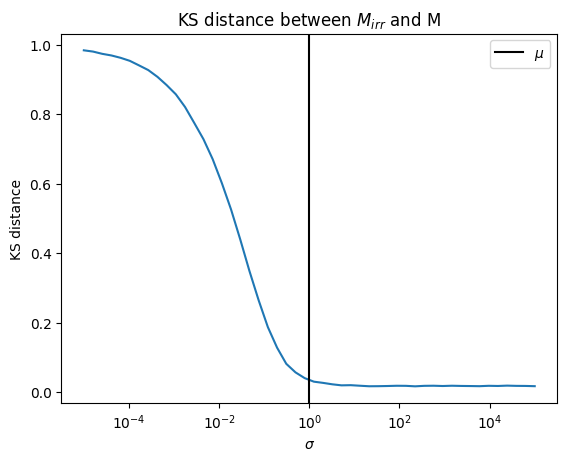

In [ ]:
D_M =  np.empty(0)
for s in sigma:
  M = np.random.normal(loc=mu,scale=s,size=N)
  D_M = np.append(D_M,[ks_2samp(M, M*f)[0]])

plt.plot(sigma,D_M)
plt.semilogx()
plt.xlabel('$\sigma$')
plt.ylabel('KS distance')
plt.axvline(1, label='$\mu$', color='black')
plt.title('KS distance between $M_{irr}$ and M')
plt.legend()

The KS distance goes to zero for $\sigma\gg\mu$, i.e. $M_{irr}$ is distributed like $M$. The errors associate to $M$ and $M_{irr}$ is now significant compere to the errors of f but from the same order between them.  

**1.6**

Shown in the previous two sections.

**1.7**

To calculate the PDF for f we can use the relation:
$$P(\chi)d\chi=P(f)df$$

$$P(f)=\Big|\frac{d\chi}{df}\Big|P(\chi)$$

$$f=\sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

First we need to isolate $\chi$ as function of $f$:

$$\chi=2f\sqrt{1-f^2}$$

The derivative is:

$$\frac{d\chi}{df}=2\sqrt{1-f^2}+f\frac{-2f}{\sqrt{1-f^2}}=2\frac{1-2f^2}{\sqrt{1-f^2}}$$

Note that if $\chi$ uniformly distributed between 0 and 1, so $f\in[\frac{1}{\sqrt{2}},1]$, so we must take the absolute value of the numerator and $P(\chi)=1$.

Now we can get the f PDF:

$$P(f)=2\frac{2 f^2-1}{\sqrt{1 - f^2}}$$

If $X$ and $Y$ are two independent, continuous random variables, described by probability density functions $f_{X}$ and $f_{Y}$ then the probability density function of $Z=XY$ is:

$$f_{Z}(z)=\int _{-\infty }^{\infty }f_{X}(x)f_{Y}(z/x){\frac {1}{|x|}}\,dx.$$

In our case, $Z=M_{irr}$, $X=f$ and $Y=M$. We know that M is normally distributed with mean $\mu$ and standard deviation $\sigma$, so the PDF
$$f_Y(z/x)=\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big[-\frac{(M_{irr}/f-\mu)^2}{2\sigma^2}\Big]}$$
and $f_X(x)$ is just $P(f)$ we calculate above, all together gives us the $M_{irr}$ PDF:
$$P(M_{irr})=\frac{1}{\sigma}\sqrt{\frac{2}{\pi}}\int_\frac{1}{\sqrt{2}}^1\exp{\Big[-\frac{(M_{irr}/f-\mu)^2}{2\sigma^2}\Big]}2\frac{f^2-1}{f\sqrt{1 - f^2}}df$$


